In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd

In [17]:
def prepare_dataset(filename):
    '''
    Extract data and preprocess it
    '''
    df = pd.read_csv(filename)
    X1, X2, X3, X, Y = [], [], [],[], []
    # X1 = df.X1.to_list()
    # X2 = df.X2.to_list()
    for item, rows in df.iterrows():
        X1.append(rows['EXAM1'])
        X2.append(rows['EXAM2'])
        X3.append(rows['FINAL'])
        
    for i in range(len(X1)):
        X.append([1,X1[i]/100,X2[i]/100])
        if X3[i] > 160:
            Y.append([1])
        else:
            Y.append([0])

    X = np.array(X)
    Y = np.array(Y)
    return X,Y

In [18]:
X,Y = prepare_dataset('data/exam.csv')

In [26]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

def sigmoid_proba(x):
    if sigmoid(x)>=0.5:
        return 1
    else:
        return 0

def nand_gate(x,y):
    return x and y

The loss at the end of training is == 0.12331447067416759


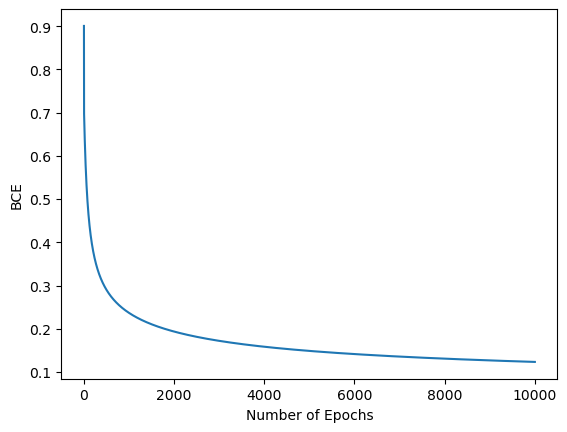

[[-43.06603745]
 [ 57.65168522]
 [ -3.7755932 ]]


In [29]:
# Implementation of the linear regression algorithm

np.random.seed(20)


EPOCHS = 10000 # number of epochs
LR = 1e-1 # Learning Rate
BATCH_SIZE = X.shape[0] # Batch Size


theta = np.random.randn(X.shape[1],1) # Randomly initialize our theta to the shape of our X
loss = []

# Gradient Descent Algorithm
for i in range(EPOCHS):
    epoch_loss = 0.0
    for b in range(0, len(X), BATCH_SIZE):
        model_output = sigmoid(X[b:b+BATCH_SIZE]@theta)
        d_theta = (X[b:b+BATCH_SIZE].T@ (((model_output - Y[b:b+BATCH_SIZE])))) # Calculates the partial derivate of loss in respective to theta
        theta -= LR * (d_theta) ## Gradient descent step

        epoch_loss += -((Y[b:b+BATCH_SIZE]*np.log(model_output)) + ((1-Y[b:b+BATCH_SIZE])*np.log(1-model_output))).mean() # Binary Cross Entropy
    loss.append(epoch_loss)


print("The loss at the end of training is ==",loss[-1])
plt.plot(range(1, EPOCHS+1),loss)
plt.ylabel('BCE')
plt.xlabel('Number of Epochs')
plt.show()
print(theta)

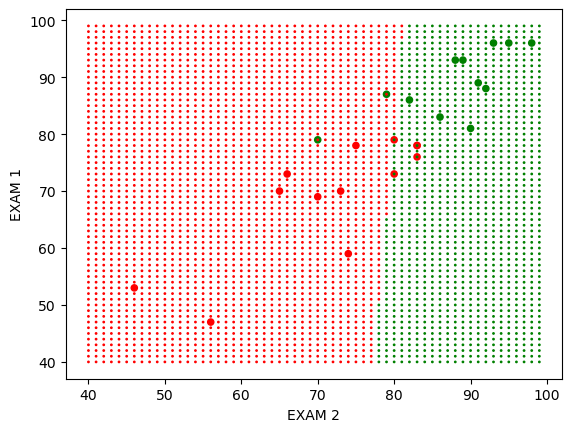

In [42]:
df = pd.read_csv('data/exam.csv')

X1 = df.EXAM1.to_list()
X2 = df.EXAM2.to_list()

categories = Y.reshape((len(Y)))

colormap = np.array(['r','g'])

# Plots the data
plt.scatter(X2, X1, s=20, c=colormap[categories])

x1, x2 , y = [],[],[]

# Creates scores between 40-100 for exam1 and exam2
for i in range(40,100):
    for j in range(40,100):
        x1.append(i)
        x2.append(j)
        model_output = sigmoid_proba(np.array([1,i/100,j/100])@theta)
        y.append(model_output)

categories = y 
# Plots how our model understands our dataset
plt.scatter(x1, x2, s=1, c=colormap[categories])
plt.ylabel('EXAM 1')
plt.xlabel('EXAM 2')
plt.show()